### Extreme Event Case Study: Labor Day 2022 Heatwave

The **Historical Observations Data Platform** is a cloud-based, historical weather observations dataset that enables access to high-quality, rigorously quality-controlled open climate and weather data. The historical weather stations included in this dataset include information that can assess the severity, duration, frequency, and rate of change over time of extreme weather events, as well as supporting projections downscaling efforts. Stringent QA/QC procedures, in-line with international protocols, are applied with custom modifications relevant to the Western US and the energy sector are included (such as temperature and precipitation extremes, winds, and solar radiation). This notebook is a detailed investigation into how the QA/QC protocol performed during a known extreme event that stressed communities and the electric grid. 


The **Labor Day 2022 Heatwave** was a 10-day significant extreme heat event impacting the Western US, particularly California, with record-breaking air temperatures that strained the power grid. The heatwave resulted in widespread power outages across the state with severe impacts including [extreme loss of life](https://www.cdph.ca.gov/Programs/OHE/CDPH%20Document%20Library/Climate-Health-Equity/CDPH-2022-Heat-Wave-Excess-Mortality-Report.pdf), [unprecedented high energy demand](https://www.sdgetoday.com/news/conservation-efforts-and-energy-storage-support-grid-reliability-during-labor-day-heatwave#:~:text=California%20was%20hot%20this%20past,the%20state%20weathered%20the%20heat.), and multiple world records broken for air temperature. <br>
Records broken: 
- Sacramento, 116°F
- Livermore, 116°F, *record last set in 1950*
- Pasadena, 103°F, *record last set in 1938*
- Long Beach, 109°F


In [1]:
# Import relevant python functions
from case_study_eval_utils import *

In [2]:
# Settings for Labor Day Heatwave
event = "aug2022_heatwave"
event_start_date = "2022-08-30"
event_end_date = "2022-09-09" 

First, let's identify and subset for relevant stations for this extreme event. 

In [ ]:
# Retrieve all stations that report observations during the event, using a 2-week window on either side
event_stns = find_event_stations(event, event_start_date, event_end_date, buffer=14, return_stn_ids=False)

Subsetting station record for event duration with 14 day buffer...
Number of stations with temporal coverage during event: 8852.
Number of stations with spatial coverage during event: 1244. 



In [ ]:
# Subset for variables relevant to the extreme event of interest
# For the Labor Day Heatwave, air temperature (tas) is going to be the most critical variable to assess
event_stns = find_event_vars(event_stns, var=["tas"])
event_stns

['tas_nobs']


,Unnamed: 0,era-id,latitude,longitude,elevation,start-date,end-date,pulled,time_checked,network,...,sfcwind_nobs,sfcwind_dir_nobs,rsds_nobs,total_nobs,qaqc,time_qaqc,merged,time_merge,geometry,intersects
0,17,ASOSAWOS_72317153144,34.98800,-117.86500,695.8584,2006-01-01 00:00:00+00:00,2022-12-31 00:00:00+00:00,Y,2023-01-09 16:28:28+00:00,ASOSAWOS,...,153780,114060,0,159060,Y,2025-05-01 19:37:48+00:00,Y,2025-06-12 18:29:48+00:00,POINT (-117.86500 34.98800),True
1,19,ASOSAWOS_72297603166,33.87200,-117.98600,26.2128,2006-01-01 00:00:00+00:00,2022-12-31 00:00:00+00:00,Y,2023-01-09 16:28:28+00:00,ASOSAWOS,...,172849,84616,0,179617,Y,2025-05-01 19:38:08+00:00,Y,2025-06-12 18:30:06+00:00,POINT (-117.98600 33.87200),True
2,33,ASOSAWOS_72393093214,34.71700,-120.56700,-30479.6952,2006-01-01 00:00:00+00:00,2022-12-31 00:00:00+00:00,Y,2023-01-09 16:28:28+00:00,ASOSAWOS,...,251494,207124,0,256855,Y,2025-05-01 19:48:07+00:00,Y,2025-06-12 18:32:43+00:00,POINT (-120.56700 34.71700),True
3,39,ASOSAWOS_72286903171,33.95300,-117.43500,257.5560,2006-01-01 00:00:00+00:00,2022-12-31 00:00:00+00:00,Y,2023-01-09 16:28:28+00:00,ASOSAWOS,...,158213,94305,0,169622,Y,2025-05-01 19:38:03+00:00,Y,2025-06-12 18:30:06+00:00,POINT (-117.43500 33.95300),True
4,44,ASOSAWOS_72286893138,33.82200,-116.50400,124.6632,2006-01-01 00:00:00+00:00,2022-12-31 00:00:00+00:00,Y,2023-01-09 16:28:28+00:00,ASOSAWOS,...,148978,104397,0,156009,Y,2025-05-01 19:37:09+00:00,Y,2025-06-12 18:29:59+00:00,POINT (-116.50400 33.82200),True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1239,15875,VCAPCD_SV,34.27640,-118.68375,1037.0000,2010-05-27 00:00:00+00:00,2023-03-08 20:00:00+00:00,Y,2023-03-21 21:39:51+00:00,VCAPCD,...,102627,102532,102407,102822,Y,2025-05-02 06:46:47+00:00,Y,2025-06-13 03:55:51+00:00,POINT (-118.68375 34.27640),True
1240,15876,VCAPCD_SU,34.29124,-118.79761,945.0000,2010-05-27 00:00:00+00:00,2023-03-08 20:00:00+00:00,Y,2023-03-21 21:39:51+00:00,VCAPCD,...,102993,103016,103052,103124,Y,2025-05-02 06:46:33+00:00,Y,2025-06-13 03:56:13+00:00,POINT (-118.79761 34.29124),True
1241,15877,VCAPCD_ER,34.25238,-119.14318,131.0000,2010-05-27 00:00:00+00:00,2023-03-08 20:00:00+00:00,Y,2023-03-21 21:39:51+00:00,VCAPCD,...,102972,102973,103011,103040,Y,2025-05-02 06:46:22+00:00,Y,2025-06-13 03:56:23+00:00,POINT (-119.14318 34.25238),True
1242,15878,VCAPCD_OJ,34.44804,-119.23131,774.0000,2010-05-27 00:00:00+00:00,2023-03-08 20:00:00+00:00,Y,2023-03-21 21:39:51+00:00,VCAPCD,...,103433,103360,102679,103492,Y,2025-05-02 06:45:55+00:00,Y,2025-06-13 03:56:07+00:00,POINT (-119.23131 34.44804),True


In [20]:
event_stns.loc[event_stns['tas_nobs'] > 1500000]

,Unnamed: 0,era-id,latitude,longitude,elevation,start-date,end-date,pulled,time_checked,network,...,sfcwind_nobs,sfcwind_dir_nobs,rsds_nobs,total_nobs,qaqc,time_qaqc,merged,time_merge,geometry,intersects
928,11270,HPWREN_HP001,32.8922,-116.42090,6181.0,2004-10-03 00:00:00+00:00,2023-03-06 21:33:00+00:00,Y,2023-03-22 03:35:06+00:00,HPWREN,...,2751258,2732517,2436719,2885413,Y,2025-05-01 20:45:57+00:00,Y,2025-06-12 21:49:43+00:00,POINT (-116.42090 32.89220),True
929,11271,HPWREN_HP002,32.7015,-116.76460,3645.0,2004-10-03 00:00:00+00:00,2023-03-06 21:33:00+00:00,Y,2023-03-22 03:35:06+00:00,HPWREN,...,2751258,2732517,2436719,2885413,Y,2025-05-01 20:45:57+00:00,Y,2025-06-12 21:49:21+00:00,POINT (-116.76460 32.70150),True
1226,14899,SGXWFO_C2462,32.8155,-116.81383,1663.0,2004-09-01 00:00:00+00:00,2023-03-08 21:18:00+00:00,Y,2023-03-22 00:06:47+00:00,SGXWFO,...,2924882,1306934,2778140,2927666,N,NaN,Y,2025-06-12 23:31:36+00:00,POINT (-116.81383 32.81550),True


In [ ]:
# 900 stations isn't reasonable to retrieve data for
# will need to subset
# can either do by length of record
# focus more on region of interest
# by specific network


# end date on csv may be wrong!!

In [34]:
# need a nice way to read in a bunch of stations rather than ds1 ds2 etc.

ds1 = xr.open_zarr("s3://wecc-historical-wx/4_merge_wx/SGXWFO/SGXWFO_C2462.zarr/")
df1 = ds1.to_dataframe().reset_index()
ds1

<xarray.Dataset>
Dimensions:             (station: 1, time: 157763)
Coordinates:
  * station             (station) object 'SGXWFO_C2462'
  * time                (time) datetime64[ns] 2004-09-01T13:00:00 ... 2022-08...
Data variables: (12/26)
    elevation           (station, time) float64 dask.array<chunksize=(1, 157763), meta=np.ndarray>
    elevation_eraqc     (station, time) float64 dask.array<chunksize=(1, 157763), meta=np.ndarray>
    hurs                (station, time) float64 dask.array<chunksize=(1, 157763), meta=np.ndarray>
    hurs_eraqc          (station, time) float64 dask.array<chunksize=(1, 157763), meta=np.ndarray>
    lat                 (station, time) float64 dask.array<chunksize=(1, 157763), meta=np.ndarray>
    lon                 (station, time) float64 dask.array<chunksize=(1, 157763), meta=np.ndarray>
    ...                  ...
    sfcWind_dir_eraqc   (station, time) float64 dask.array<chunksize=(1, 157763), meta=np.ndarray>
    sfcWind_eraqc       (station, time) float64 dask.array<chunksize=(1, 157763), meta=np.ndarray>
    tas                 (station, time) float64 dask.array<chunksize=(1, 157763), meta=np.ndarray>
    tas_eraqc           (station, time) float64 dask.array<chunksize=(1, 157763), meta=np.ndarray>
    tdps_derived        (station, time) float64 dask.array<chunksize=(1, 157763), meta=np.ndarray>
    tdps_derived_eraqc  (station, time) float64 dask.array<chunksize=(1, 157763), meta=np.ndarray>
Attributes: (12/13)
    anemometer_height_m:    nan
    barometer_elevation_m:  nan
    citation:               
    comment:                Final v1 data product. This data has been subject...
    disclaimer:             This document was prepared as a result of work sp...
    history:                MADIS_clean.py script run on 06-05-2023, 17:56:04...
    ...                     ...
    license:                
    raw_files_merged:       4
    source:                 
    station_name:           CW2462 Alpine
    thermometer_height_m:   nan
    title:                  SGXWFO quality controlled

<AxesSubplot:xlabel='time'>

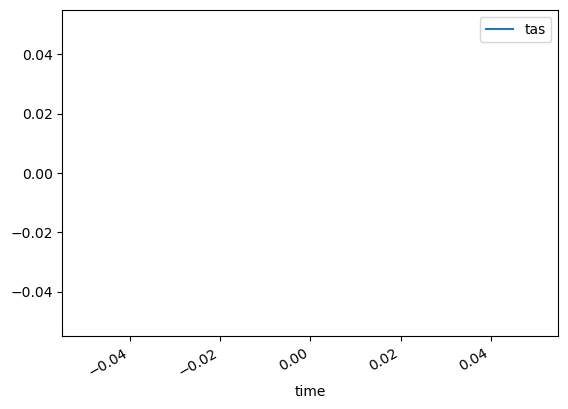

In [38]:
df1 = df1.loc[df1.time.dt.year > 2022]
df1.plot(x='time', y='tas')

In [ ]:
# produce simple timeseries plots of variable over the event
# include QC flags
# if possible, add shaded bars or something (look at old code) to indicate the event itself

In [ ]:
# some kind of map

In [ ]:
# table / stats "read out" on extremes during the event

In [ ]:
# table / stats "read out" on QC flags, including if we think refinement to QC tests would improve coverage

In [ ]:
# some function/thing in terms of how many stations "detected" the event

In [ ]:
# summary information via markdown close out of what we have learned